<a href="https://colab.research.google.com/github/iraaditi/Machine-Learning/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #for handling large arrays of peration, matrices, etc
import matplotlib.pyplot as plt #Data Visualization
import pandas as pd # Data handling , iport , export , data cleaning etc
import seaborn as sns #data visualization and plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv('Iris.csv') #load and preview data
df.head()
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [7]:
rows, col = df.shape
print("Rows : %s , column : %s" % (rows,col))

Rows : 150 , column : 6


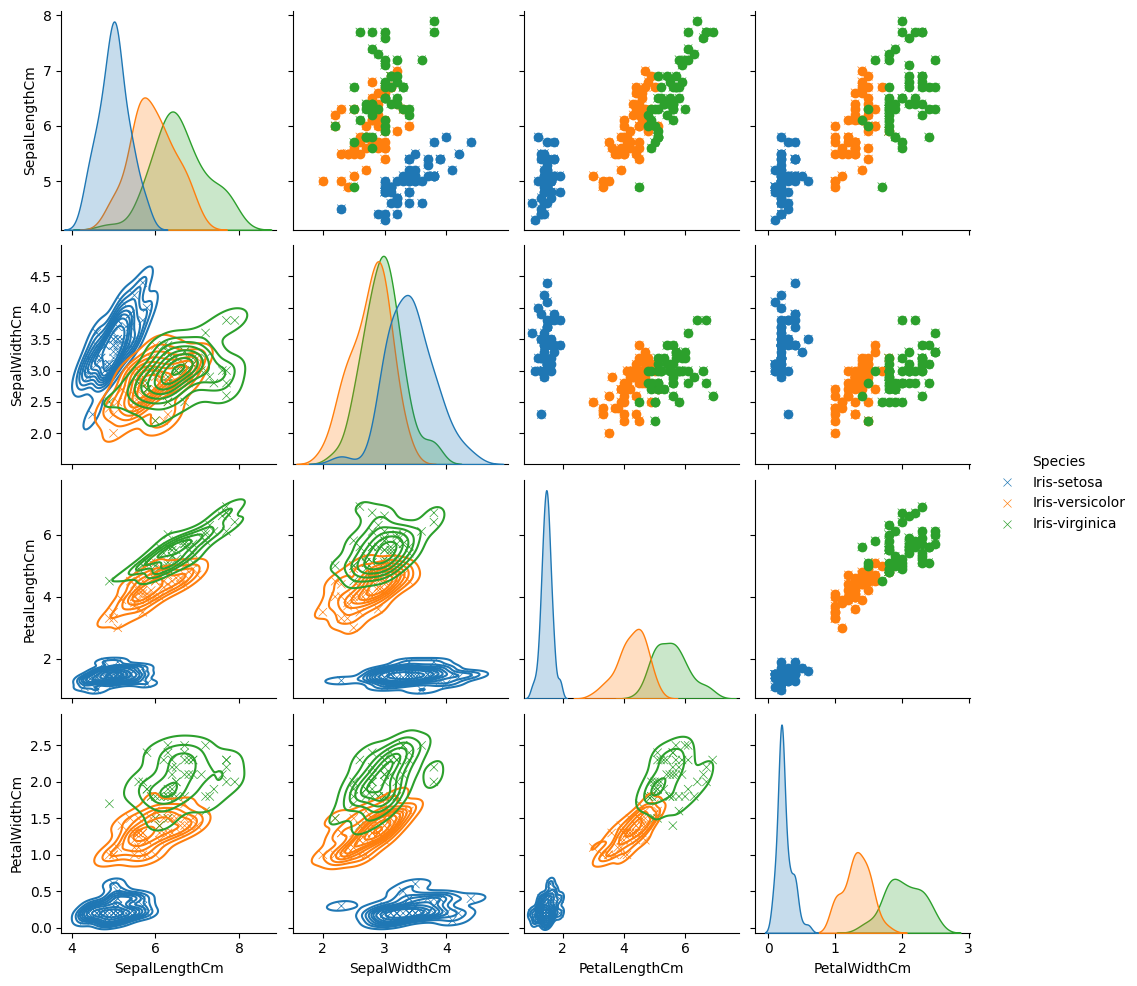

In [8]:
snsdata = df.drop(['Id'], axis=1)
g= sns.pairplot(snsdata, hue='Species', markers='x')
g = g.map_upper(plt.scatter)
g=g.map_lower(sns.kdeplot)

In [9]:
#Features (X) and target (y)
X = df[['SepalLengthCm','SepalWidthCm', 'PetalWidthCm']]
y = df['PetalLengthCm']

In [10]:
#Split into training and testing sets (80% train , 20% test)
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [11]:
#Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
#Make predictions on the test set
y_pred = model.predict(X_test)

In [13]:
#Evaluate the model
mse = mean_squared_error (y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print("Mean Squared Error:" , mse)
print("R^2 Score:", r2)
print("Coefficients:", model.coef_)
print("intercept:", model.intercept_)

Mean Squared Error: 0.12991981605759947
R^2 Score: 0.9603587427485161
Coefficients: [ 0.72417306 -0.641963    1.46632204]
intercept: -0.2504659324864602


In [16]:
#Display Actual vs Predicted values in a table

results_df = pd.DataFrame({
    'Actual Petal Length (cm)': y_test.values,
    'Predicted Petal Length (cm)': np.round(y_pred,2)
})
results_df = results_df.sort_values(by='Actual Petal Length (cm)').reset_index(drop=True)
print("\n Predicted vs Actual values (sorted by actual):")
print(results_df.to_string(index=True))


 Predicted vs Actual values (sorted by actual):
    Actual Petal Length (cm)  Predicted Petal Length (cm)
0                        1.3                         1.78
1                        1.4                         1.45
2                        1.4                         1.74
3                        1.5                         2.06
4                        1.5                         1.44
5                        1.5                         1.45
6                        1.6                         1.77
7                        1.6                         1.53
8                        1.6                         1.39
9                        1.7                         1.88
10                       3.6                         3.85
11                       3.9                         3.81
12                       3.9                         3.98
13                       4.5                         4.43
14                       4.5                         3.99
15                     

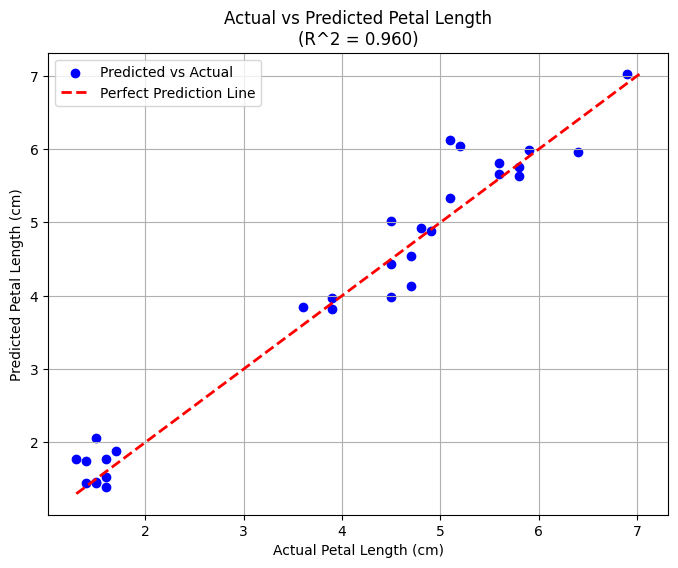

In [17]:
#Plot Actual vs Predicted with perfect prediction line
plt.figure(figsize=(8,6))
plt.scatter(y_test , y_pred , color='blue', label='Predicted vs Actual')
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val,max_val], color='red', linestyle='--',linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual Petal Length (cm)')
plt.ylabel('Predicted Petal Length (cm)')
plt.title(f'Actual vs Predicted Petal Length\n(R^2 = {r2:.3f})')
plt.legend()
plt.grid(True)
plt.show()